# Example: Nonlinear system

Consider the nonlinear differential equation

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
=
\begin{pmatrix}
- y(t) \\
x(t) + (1 - x(t)^2) ~ y(t)
\end{pmatrix}
$$

with intial value 

$$
\begin{pmatrix}
x(0) \\
y(0)
\end{pmatrix}
=
\begin{pmatrix}
x_{0} \\
y_{0}
\end{pmatrix}
$$

## Equilibrium points

The equlibrium point of the nonlinear system are found with

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0
\end{pmatrix}
=
\begin{pmatrix}
- y \\
x + ( 1 - x^2 ) ~ y
\end{pmatrix}
$$

Consequently, only one equilibrium point exists:
*  $ (x_{0}, y_{0}) = (0, 0) $



##  Forward Euler approximation

The forward [Euler method](https://en.wikipedia.org/wiki/Euler_method) 

$$
\dot{x}(t) = \frac{x(t + \Delta T) - x(t)}{\Delta T} = \frac{x_{n+1} - x_{n}}{\Delta T}
$$

is applied on the nonlinear system to gain

$$
\begin{pmatrix}
x_{n+1} \\
y_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
x_{n} - \Delta T  y_{n} \\
y_{n} + \Delta T (x_{n} + (1 - x_{n}^2) ~ y_{n})
\end{pmatrix}
$$

### Simulation and phase plane

The resulting nonlinear difference equation is simulated with sampling time $\Delta T = 0.001$ and initial value $(x_{0}, y_{0}) = (2, 0)$.



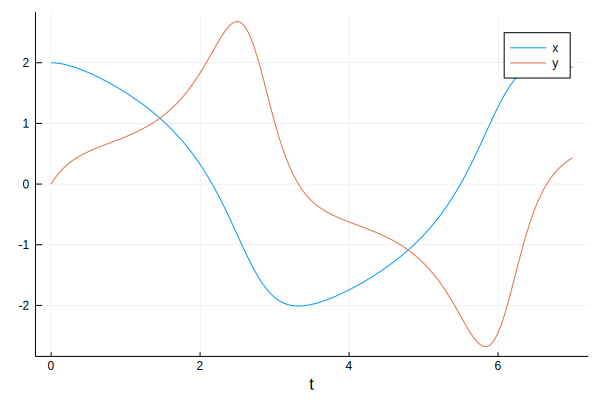

In [1]:
f(x,ΔT) = [x[1] - ΔT *x[2]; x[2] + ΔT*(x[1] + (1 - x[1]^2)*x[2])] # Nonlinear difference equation

x₀ = [2.0; 0.0]; # Initial value
Ts = 0.001; # Sampling time
Tf = 7.0; # Final simulation time

tspan = 0 : Ts : Tf; # Time span or interval

x_sol = zeros(2, length(tspan)); # Solution vector
x_sol[:, 1] = x₀;

for i=1 : length(tspan)-1
    x_sol[:, i+1] = f(x_sol[:, i], Ts);
end

using Plots;
gr();

plot( tspan, x_sol[1,:], xaxis="t", label="x")
plot!( tspan, x_sol[2,:], label="y")


The **phase plane** summarizes the x- and y-points in a single graph.

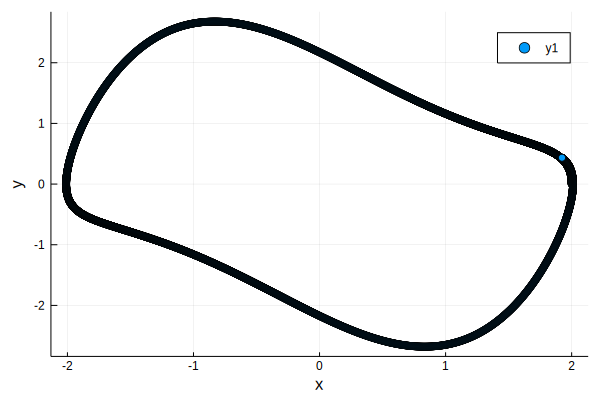

In [2]:
scatter( x_sol[1,:], x_sol[2,:], xaxis="x", yaxis="y")

### Attractors and Deflectors

The approximated dynamical system is used to check whether the equilibrium points are attractors or deflectors. Small disturbances $\varepsilon$ are add to the equilibrium points to check if the trajectory returns to the equilibrium points. 


The resulting plot shows that the equilibrium points are **deflectors**.



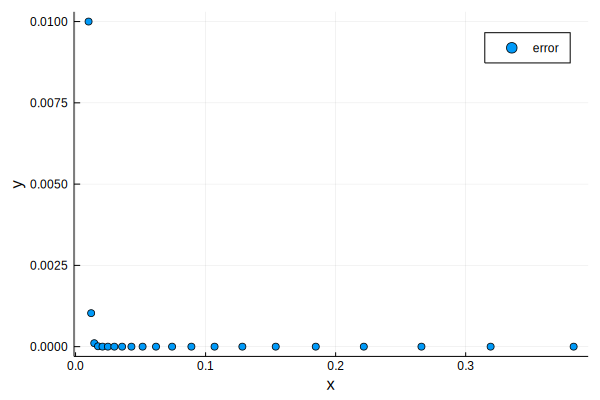

In [3]:
x₀ = [0.0 ; 0.0] # Equilibrium at the origin

ε = [0.01 ; 0.01]; # Small disturbance

T = 0.1 # Sampling time

f(x,ΔT) = [x[1] + ΔT *x[1]*( 2 - x[2]); x[2] + ΔT*x[2]*(3*x[1] - 9)] # Nonlinear difference equation

Nsteps = 20; # Number of time steps
x0N = zeros(length(x₀), Nsteps+1); # Solution trajectory for first equilibrium point

x0N[:, 1] = x₀ + ε;

for i = 1 : Nsteps
   x0N[:, i+1] = f(x0N[:,i], T)
end

# Error from initial value
err = x0N .- x₀; 

scatter(err[1,:], err[2,:], xaxis="x", yaxis="y", label="error")


## Linearization

The nonlinear system 

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
=
\begin{pmatrix}
- y \\
x + ( 1 - x^2 ) ~ y
\end{pmatrix}
= f((x,y),t)
$$

is [linearized](https://en.wikipedia.org/wiki/Linearization) as

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
=
\begin{pmatrix}
- y \\
x 
\end{pmatrix}
= 
\begin{pmatrix}
0 & -1 \\
1 & 0 
\end{pmatrix}
~
\begin{pmatrix}
x \\
y 
\end{pmatrix} 
\text{.}
$$

Linear time-invariant systems

$$
\dot{x}(t) = A ~x(t) \quad \text{with} \quad x(0) = x_{0} 
$$

can be solved with the Laplace transform

$$
s X(s) - x_{0} = A ~ X(s)
$$

and further

$$
x_{0} = (s I - A) X(s) \text{.}
$$

The resulting states in the frequency-domain

$$
X(s) = (s I - A)^{-1} x_{0} = 
\begin{pmatrix}
s & 1 \\
-1 & s 
\end{pmatrix}^{-1}
\begin{pmatrix}
x_{0,1} \\
x_{0,2}
\end{pmatrix} \\
= \frac{1}{s^2 + 1}
\begin{pmatrix}
s & -1 \\
1 & s 
\end{pmatrix}
~
\begin{pmatrix}
2 \\
0 
\end{pmatrix}
$$

are transformed backwards to the time domain using the [inverse Laplace transform](https://en.wikipedia.org/wiki/Laplace_transform#Table_of_selected_Laplace_transforms)

$$
x(t) = 
\begin{pmatrix}
2 ~cos(t) \\
2 ~ sin(t) 
\end{pmatrix} \text{.}
$$



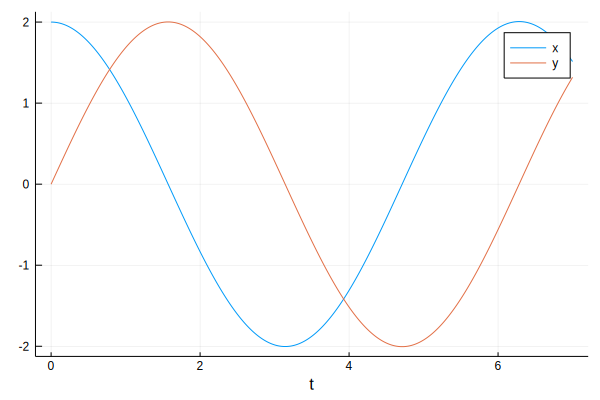

In [4]:
f(x,ΔT) = [x[1] - ΔT * x[2] ; x[2] + ΔT*x[1]] # Linearized difference equation

x₀ = [2.0; 0.0]; # Initial value
Ts = 0.001; # Sampling time
Tf = 7.0; # Final simulation time

tspan = 0 : Ts : Tf; # Time span or interval

x_sol_approx = zeros(2, length(tspan)); # Solution vector
x_sol_approx[:, 1] = x₀;

for i=1 : length(tspan)-1
    x_sol_approx[:, i+1] = f(x_sol_approx[:, i], Ts);
end

using Plots;
gr();

plot( tspan, x_sol_approx[1,:], xaxis="t", label="x")
plot!( tspan, x_sol_approx[2,:], label="y")

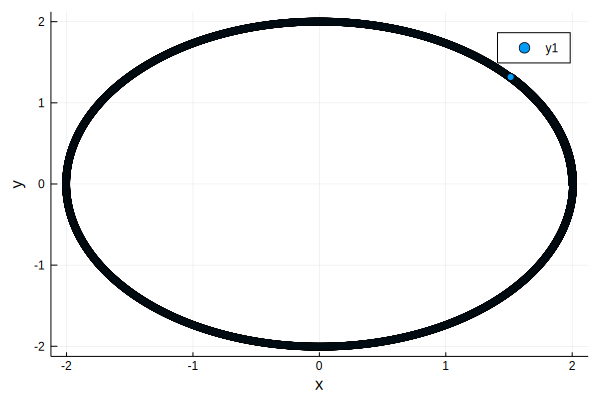

In [5]:
scatter( x_sol_approx[1,:], x_sol_approx[2,:], xaxis="x", yaxis="y")